In [14]:
import os
import pandas as pd

# 파일 이름 지정
file_name = 'tips.xlsx'

# 현재 디렉토리와 결합하여 절대 경로 생성
file_path = os.path.abspath(file_name)

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [17]:
df_time=df.groupby('time')
print(df_time)

In [18]:
df_time.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2


In [24]:
df_dinner=df.loc[df['time']=='Dinner']
df_lunch=df.loc[df['time']=='Lunch']

In [28]:
#데이터 복사본 생성

df_dinner = df[df['time'] == 'Dinner'].copy()
df_lunch = df[df['time'] == 'Lunch'].copy()

df_dinner['total_bill/tip'] = (df_dinner['tip'] / df_dinner['total_bill']) * 100
df_lunch['total_bill/tip'] = (df_lunch['tip'] / df_lunch['total_bill']) * 100


In [29]:
df_dinner.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill/tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_dinner[['total_bill', 'tip','size']] #independant variables
y = df_dinner['total_bill/tip'] #dependant variable

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [34]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)

print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

Model Coefficients: [-6.37619198  6.62485843 -0.3111056 ]
Model Intercept: 15.951778877977732


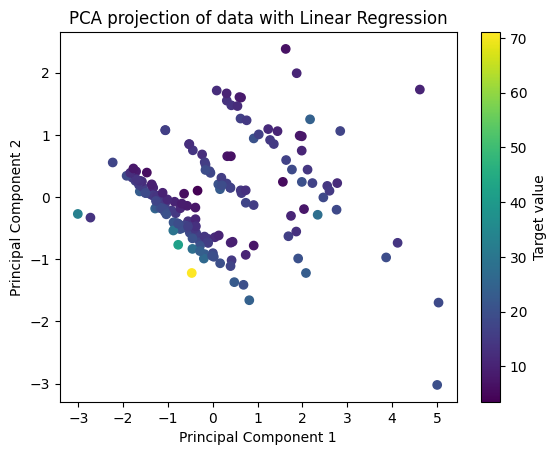

In [37]:
from sklearn.decomposition import PCA

# PCA를 사용해 데이터 2D로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 회귀 직선의 예측값을 시각화
y_pred = model.predict(X)

# 2D로 변환된 데이터와 회귀 직선 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', label='Actual data')
plt.colorbar(label='Target value')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA projection of data with Linear Regression')
plt.show()
